<h1>AKA, Joy Divisionify your data!</h1>
<h3>for fun and possibly science</h3>

So the other day I was analyzing some of my voltage oscillation data when a Joy Division song came on ("Shadowplay" if you're wondering) and their Unknown Pleasures cover art popped into my head. If you haven't seen it yet [you should](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=unknown%20pleasures%20cover). Of course, this also led down a Google hole in order to find the origin, which was made remarkably simple by [this great article](http://blogs.scientificamerican.com/sa-visual/pop-culture-pulsar-origin-story-of-joy-division-8217-s-unknown-pleasures-album-cover-video/) from Jen Christiansen for SciAm a few months back.

Anyway, it got me thinking. Could I use this sort of stacked graph to make a useful figure for my upcoming paper? Also, can I just straight Joy Divisionify my data? I mean, how cool would that be?

Turns out, it can be pretty damn cool. And since I needed the visualization practice anyway I decided to go ahead and write some code.

Note: I would like to one day do this with the KDEs of my data, but I couldn't figure out how to take the individual KDEs and manipulate them in such a way to make the resulting plot all that beautiful, so I scratched that idea for the time being. 

In [1]:
%matplotlib inline
%pylab inline
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


#Data

First, we're going to need some data (this particular dataset is derived from the same one I used in my signal processing notebook). 

This is just a simple 2D matrix of normalized histograms I made while analyzing neuronal voltage oscillations. 

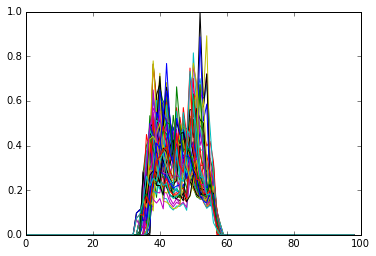

In [2]:
from numpy import genfromtxt

data = genfromtxt('../example_data/unknown_pleasures_histogram.csv', delimiter=',')
plt.plot(data)
plt.show()

Looks good. Now I just need to stack them, clean up the boarders, make sure the colors are correct, and we're good to go.

As you can see I ended up going with matplotlib's polygons in order to make the actual shapes. There is a reason for this that I will discuss at the end of the notebook (if you care).

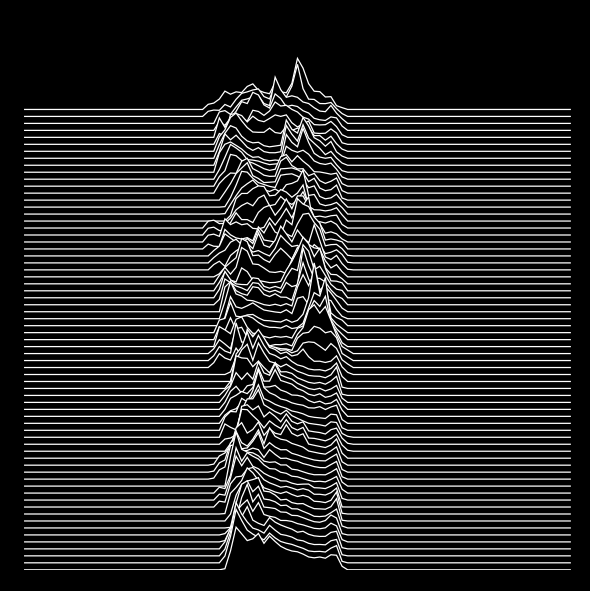

In [3]:
from matplotlib.patches import Polygon

# set the basic figure parameters
fig = plt.figure(1, figsize=(10,10))
fig.patch.set_facecolor('black')
ax = fig.add_subplot(111)

# note: I originally thought of this as a 3d plot made to be viewed head on, hence the var "new_z"
new_z = len(data[1])  
N = len(data)
x = np.arange(-0.99,0,0.01)

# create the polygons and stack them
for z in np.arange(new_z):
    y = data[:,z]
    ax.add_patch(Polygon(np.c_[x, (y + z/10)], fc='0', ec='1', lw=1.25, 
                         closed=False, zorder=-z, alpha=1))

ax.axis('off')
ax.autoscale_view()
plt.show()

#Bring the noise

You want it to look a little more authentic? Well, then let's add some noise in there!

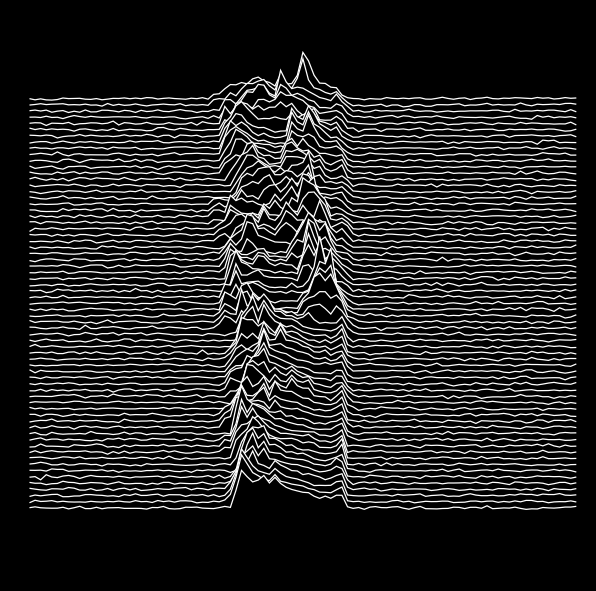

In [4]:
fig = plt.figure(1, figsize=(10,10))
fig.patch.set_facecolor('black')
ax = fig.add_subplot(111)

new_z = len(data[1])
N = len(data)
x = np.arange(-0.99,0,0.01)

# make all the data polygons and stack them
for z in np.arange(new_z):
    y = data[:,z]
    noise = (np.random.randn(len(data))/80) # add however much noise you'd like
    ax.add_patch(Polygon(np.c_[x, (y + z/10) + noise], fc='0', ec='1', lw=1.25, 
                         closed=False, zorder=-z, alpha=1))

ax.axis('off')
ax.autoscale_view()
plt.show()

# There ya go! All done.

Unless you're wondering why I had to use polygons instead of the "fill" function. Well, this is why:

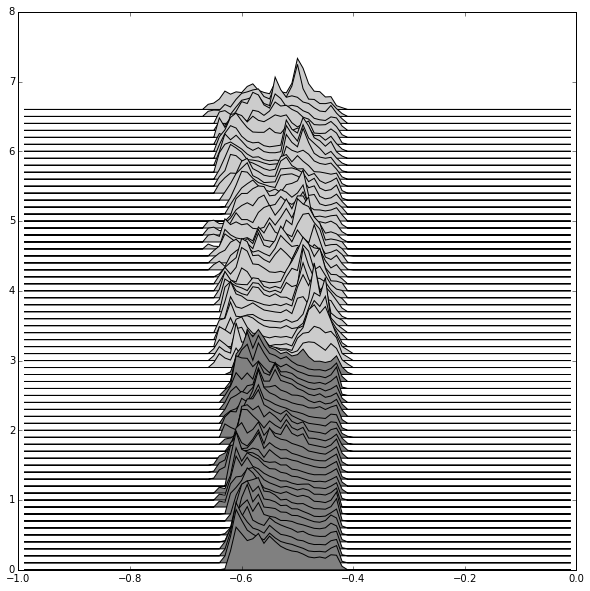

In [5]:
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111)

new_z = len(data[1])
N = len(data)
x = np.arange(-0.99,0,0.01)

# create the polygons and stack them
for z in np.arange(new_z):
    if z <= 28:
        ax.fill(x, data[:,z] + (z/10), fc='0.5', ec='0', lw=1.0, zorder=-z, alpha=1.0)
    else:
        ax.fill(x, data[:,z] + (z/10), fc='0.8', ec='0', lw=1.0, zorder=-z, alpha=1.0)

As you can see, I used a slightly different example. This is the same data above, just color coded for a baseline and treatment phase, but you can see that the x-axis for each plot remains in every filled plot. You're going to have to trust me when I say that it just doesn't look all that great when you Joy Divisionify this type of plot. 

Well, there ya go. That's the reason. You're welcome.

Hoped ya liked this. 